# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import json
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_name = []
country_name = []
latitude = []
longitude = []
temperature = []
humidity = []
wind_speed = []
cloudiness = []
date = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [3]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Pocessing Record {} of set {}|{}'.format(record_counter, set_counter, city))
    
    try:
        
        country_name.append(response['sys']['country'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        city_name.append(city)
    except:
        pass

print('End')


------------------------
Beginning Data Retrieval
------------------------
Pocessing Record 1 of set 0|east london
Pocessing Record 2 of set 0|fairbanks
Pocessing Record 3 of set 0|tiksi
Pocessing Record 4 of set 0|tuatapere
Pocessing Record 5 of set 0|kaitangata
Pocessing Record 6 of set 0|illoqqortoormiut
Pocessing Record 7 of set 0|taolanaro
Pocessing Record 8 of set 0|punta arenas
Pocessing Record 9 of set 0|mount gambier
Pocessing Record 10 of set 0|tupik
Pocessing Record 11 of set 0|ushuaia
Pocessing Record 12 of set 0|alofi
Pocessing Record 13 of set 0|cape town
Pocessing Record 14 of set 0|hambantota
Pocessing Record 15 of set 0|rikitea
Pocessing Record 16 of set 0|onega
Pocessing Record 17 of set 0|atuona
Pocessing Record 18 of set 0|bluff
Pocessing Record 19 of set 0|itacoatiara
Pocessing Record 20 of set 0|saldanha
Pocessing Record 21 of set 0|maun
Pocessing Record 22 of set 0|coracora
Pocessing Record 23 of set 0|laiyang
Pocessing Record 24 of set 0|khatanga
Pocessing Recor

Pocessing Record 11 of set 4|burica
Pocessing Record 12 of set 4|deputatskiy
Pocessing Record 13 of set 4|port blair
Pocessing Record 14 of set 4|sulangan
Pocessing Record 15 of set 4|paciran
Pocessing Record 16 of set 4|lima
Pocessing Record 17 of set 4|jijiang
Pocessing Record 18 of set 4|touros
Pocessing Record 19 of set 4|klaksvik
Pocessing Record 20 of set 4|balakhta
Pocessing Record 21 of set 4|pevek
Pocessing Record 22 of set 4|mubende
Pocessing Record 23 of set 4|russell
Pocessing Record 24 of set 4|yinchuan
Pocessing Record 25 of set 4|zhigansk
Pocessing Record 26 of set 4|kirakira
Pocessing Record 27 of set 4|rafaela
Pocessing Record 28 of set 4|port macquarie
Pocessing Record 29 of set 4|aklavik
Pocessing Record 30 of set 4|saint-pierre
Pocessing Record 31 of set 4|yamada
Pocessing Record 32 of set 4|faya
Pocessing Record 33 of set 4|berdigestyakh
Pocessing Record 34 of set 4|coihaique
Pocessing Record 35 of set 4|duncan
Pocessing Record 36 of set 4|muros
Pocessing Record 37

Pocessing Record 22 of set 8|paamiut
Pocessing Record 23 of set 8|udachnyy
Pocessing Record 24 of set 8|beringovskiy
Pocessing Record 25 of set 8|abu dhabi
Pocessing Record 26 of set 8|covington
Pocessing Record 27 of set 8|mwandiga
Pocessing Record 28 of set 8|catamarca
Pocessing Record 29 of set 8|kahului
Pocessing Record 30 of set 8|bamnet narong
Pocessing Record 31 of set 8|yenagoa
Pocessing Record 32 of set 8|gravdal
Pocessing Record 33 of set 8|ormara
Pocessing Record 34 of set 8|kjollefjord
Pocessing Record 35 of set 8|saint-augustin
Pocessing Record 36 of set 8|ukiah
Pocessing Record 37 of set 8|gizo
Pocessing Record 38 of set 8|ileza
Pocessing Record 39 of set 8|impfondo
Pocessing Record 40 of set 8|akdagmadeni
Pocessing Record 41 of set 8|roald
Pocessing Record 42 of set 8|portobelo
Pocessing Record 43 of set 8|farafangana
Pocessing Record 44 of set 8|monrovia
Pocessing Record 45 of set 8|bulancak
Pocessing Record 46 of set 8|calvinia
Pocessing Record 47 of set 8|paita
Pocess

In [4]:
#Convert Raw Data to DataFrame
#export the city data into a .csv.
#Display the DataFrame

In [5]:
cities_df = pd.DataFrame({
    "Country Name": country_name,
    "City Name": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temperature(F)": temperature,
    "Humidity(%)": humidity,
    "Wind Speed": wind_speed,
    "Cloudiness": cloudiness,
    "Date": date
   })

# Export to CSV
cities_df.to_csv(output_data_file)

cities_df

,Country Name,City Name,Latitude,Longitude,Temperature(F),Humidity(%),Wind Speed,Cloudiness,Date
0,ZA,east london,-33.02,27.91,71.60,78,9.17,75,1581445498
1,US,fairbanks,64.84,-147.72,-15.00,97,3.36,75,1581445148
2,RU,tiksi,71.69,128.87,-28.41,92,3.76,11,1581445365
3,NZ,tuatapere,-46.13,167.68,53.01,94,1.01,100,1581445214
4,NZ,kaitangata,-46.28,169.85,54.00,91,2.28,72,1581445392
...,...,...,...,...,...,...,...,...,...
540,JP,shimoda,34.67,138.95,43.00,74,1.01,84,1581445272
541,CA,bonavista,48.65,-53.11,32.00,84,15.01,22,1581445662
542,US,lexington,37.99,-84.48,42.01,86,4.70,90,1581445372
543,US,albion,42.24,-84.75,35.01,85,16.11,90,1581445662


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
#Format date
date =datetime.datetime.fromtimestamp(
        int(cities_df['Date'][0])
    ).strftime('%m/%d/%Y')

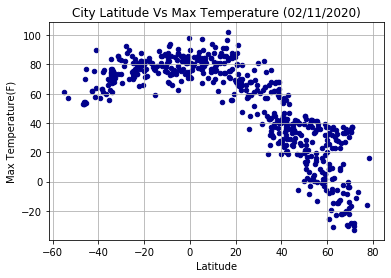

In [13]:
#Plot latitude vs Max Temp
cities_df.plot(kind='scatter', x='Latitude', y='Temperature(F)', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.grid()
plt.savefig("Images/lat_max_temp.png")


#### Latitude vs. Humidity Plot

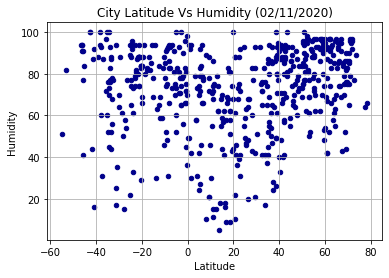

In [15]:
#Plot latitude vs Humidity
cities_df.plot(kind='scatter', x='Latitude', y='Humidity(%)', c='DarkBlue')
plt.title('City Latitude Vs Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig("Images/lat_Humid.png")

#### Latitude vs. Cloudiness Plot

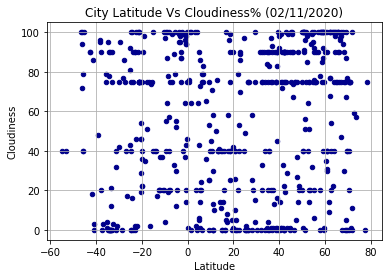

In [19]:
# Cloudiness (%) vs. Latitude
cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness% ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig("Images/lat_Winds.png")

#### Latitude vs. Wind Speed Plot

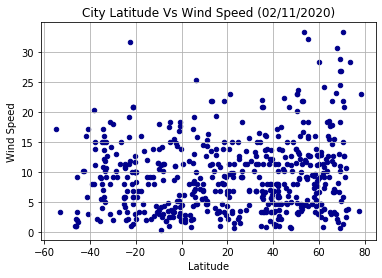

In [18]:
# Wind Speed (mph) vs. Latitude
cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("Images/lat_Winds.png")

In [ ]:
#description of three observable trends based on the data.
#1. The temperature appears to be higher the closer you get to the equator.
#2. The humidity does not appear to be higher at the equator
#3. The equator does not have more clouds or higher winds 